In [1]:
from scipy.stats import bootstrap
import pandas as pd
import numpy as np 
import seaborn as sns


In [2]:
df = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_statistics/all_data/bootstrap_data.csv')

In [3]:
df.head()

,value,group
0,100.719713,experimental
1,106.771525,experimental
2,106.974612,experimental
3,109.249662,experimental
4,116.230142,experimental


In [4]:
df.groupby('group').agg({'value': 'count'})

,value
group,
control,760
experimental,494


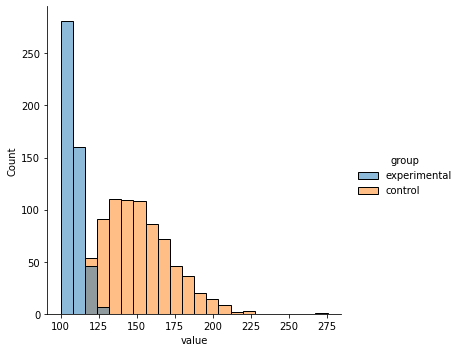

In [5]:
sns.displot(data=df, x="value", hue="group")

In [6]:
df.groupby('group').agg({'value': np.median})

,value
group,
control,148.832127
experimental,106.982597


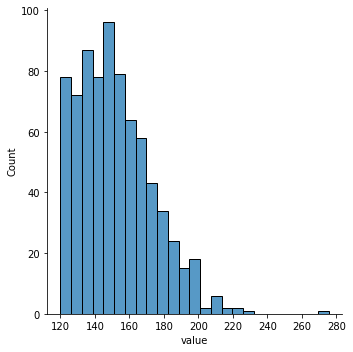

In [7]:
sns.displot(data=df[df.group == 'control'], x="value")

In [8]:
control_df = df[df.group == 'control']

In [9]:
control_df.value.median()

148.83212650911054

In [10]:
medians = []

In [11]:
n = 10000

In [12]:
for i in range(10000):
    sample_data = control_df.sample(frac=1, replace=True)
    sample_median = sample_data.value.median()
    medians.append(sample_median)

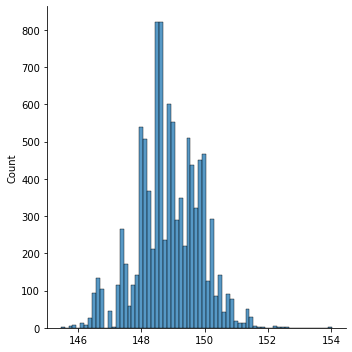

In [13]:
sns.displot(medians)

In [14]:
pd.Series(medians).quantile(0.975)

150.77666481255312

In [15]:
pd.Series(medians).quantile(0.025)

146.67710291645344

In [16]:
bootstrap((control_df.value, ), np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=150.51500565897447, high=153.5924207010392), standard_error=0.7787101405746552)

In [17]:
exp_df = df[df.group == 'experimental']
median_diff = []

for i in range(10000):
    sample_data_control = control_df.sample(frac=1, replace=True)
    sample_median_control = sample_data_control.value.median()
    
    
    sample_data_exp = exp_df.sample(frac=1, replace=True)
    sample_median_exp = sample_data_exp.value.median()
    
    sample_median_diff = sample_median_control - sample_median_exp
    median_diff.append(sample_median_diff)
    



In [18]:
pd.Series(median_diff).quantile(0.975)

43.952999062928775

In [19]:
pd.Series(median_diff).quantile(0.025)

39.69855054814987